# Brain Tumor Classification

Brain tumor classification using the VGG16 neural network model involves leveraging a pre-trained convolutional neural network (CNN) to identify and classify brain tumors from medical imaging data, such as MRI scans.

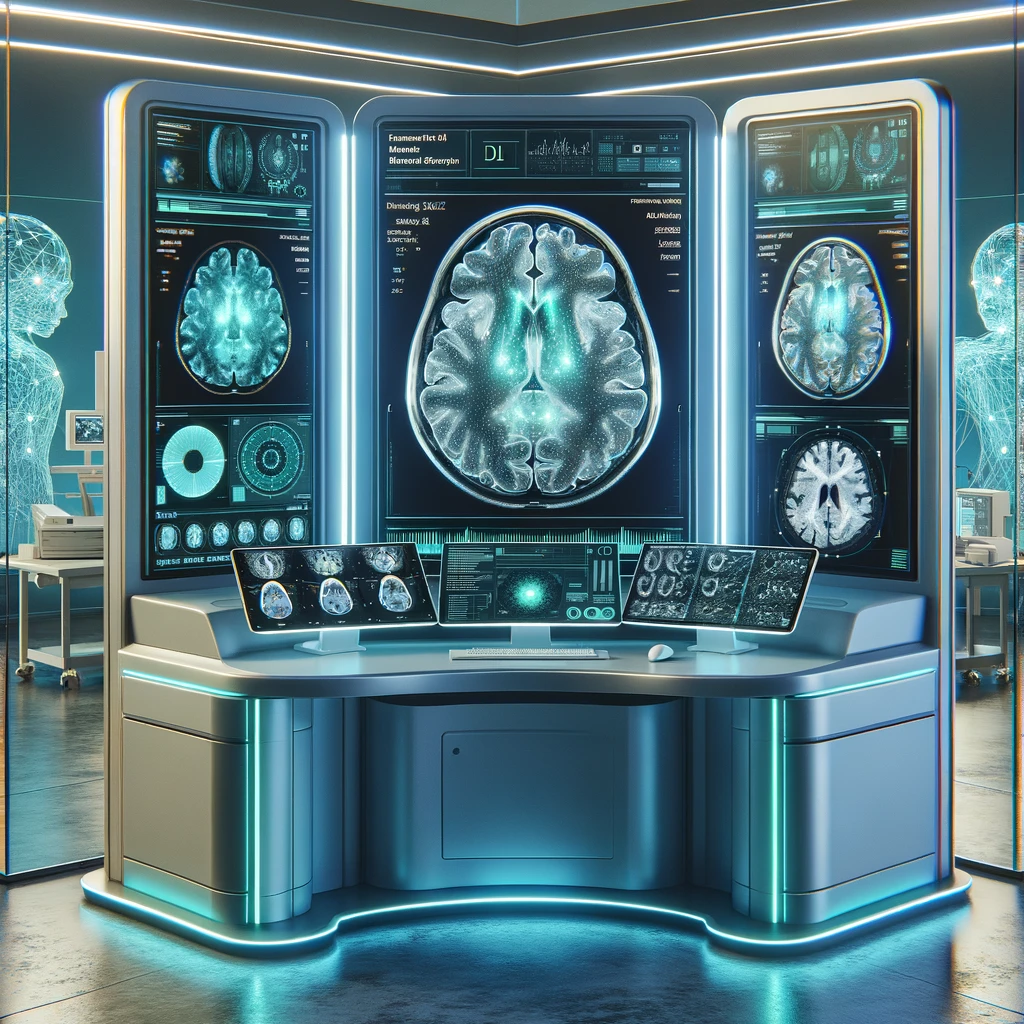

## Overview of VGG16
VGG16 is a deep convolutional neural network developed by the Visual Graphics Group (VGG) at the University of Oxford. It was designed to perform well in large-scale image recognition tasks. The network consists of 16 layers that include convolutional layers, max pooling layers, and fully connected layers. VGG16 is known for its simplicity and its effectiveness, having achieved top results in the ImageNet competition.

## 1. Imports and Setup

- Libraries and modules are imported that will be needed to preprocess data, construct the neural network, handle files, etc.
- Warnings are suppressed for cleaner output.

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import BatchNormalization
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

## 2. Load Pretrained VGG16 Model

In [2]:
# Load the pretrained Network
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

# Freeze the layers
for layer in model_vgg16_conv.layers:
    layer.trainable = False

2024-04-29 02:48:52.329360: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-29 02:48:52.329382: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-29 02:48:52.329387: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-29 02:48:52.329418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-29 02:48:52.329430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- Load the VGG16 model pretrained on ImageNet data.
- Freeze all layers to prevent them from being updated during training.

## 3. Prepare Datasets

In [3]:
# Training parameters
img_width, img_height = 150, 150

batch_size = 128
nb_epochs = 10

from keras.preprocessing.image import ImageDataGenerator

def prepare_the_datasets(dataset_directory, batch_size, image_size, validation_split=0.2):
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=validation_split  # Split the dataset into training and validation
    )

    train_generator = datagen.flow_from_directory(
        directory=dataset_directory,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset='training'  # Specify as training data
    )

    validation_generator = datagen.flow_from_directory(
        directory=dataset_directory,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset='validation'  # Specify as validation data
    )

    return train_generator, validation_generator

# Using the function to prepare datasets
data_dir = 'Training'
train_generator, validation_generator = prepare_the_datasets(data_dir, batch_size, img_width, validation_split=0.2)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


- Define image preprocessing and augmentation parameters.
- Generate training and validation data loaders.

## 4. Define the Model Architecture

In [4]:
# Build a classification model on top of Base Network with added layers
input_layer = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input_layer)
x = Flatten()(output_vgg16_conv)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)  # Adding Batch Normalization
x = Dropout(0.5)(x)  # Adding Dropout
x = Dense(256, activation='relu')(x)  # Additional Dense Layer
x = BatchNormalization()(x)  # Adding Batch Normalization
x = Dropout(0.5)(x)  # Adding Dropout
x = Dense(4, activation='softmax')(x)
model = Model(input_layer, x)

- Construct a new model using the frozen VGG16 as a base.
- Add Flatten, Dense, BatchNormalization, and Dropout layers for learning from the VGG16 features.
- The final layer uses softmax activation suitable for multi-class classification.

## 5. Compile and Train the Model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training with callbacks
callbacks = [ModelCheckpoint('vgg16-improved-weights.h5', monitor='val_accuracy', save_best_only=True)]

history = model.fit(
    train_generator,
    epochs=nb_epochs,
    callbacks=callbacks,
    validation_data=validation_generator
)

print('Training Completed!')


Epoch 1/10


2024-04-29 02:48:53.521805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.7495

2024-04-29 02:49:07.313283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 483ms/step - loss: 0.7616 - accuracy: 0.7495 - val_loss: 2.7862 - val_accuracy: 0.5890
Epoch 2/10
36/36 [==============================] - 17s 466ms/step - loss: 0.4476 - accuracy: 0.8370 - val_loss: 1.0804 - val_accuracy: 0.6968
Epoch 3/10
36/36 [==============================] - 17s 468ms/step - loss: 0.3742 - accuracy: 0.8670 - val_loss: 0.8625 - val_accuracy: 0.7564
Epoch 4/10
36/36 [==============================] - 17s 469ms/step - loss: 0.3197 - accuracy: 0.8836 - val_loss: 0.7056 - val_accuracy: 0.7870
Epoch 5/10
36/36 [==============================] - 17s 469ms/step - loss: 0.2850 - accuracy: 0.8954 - val_loss: 0.5268 - val_accuracy: 0.8265
Epoch 6/10
36/36 [==============================] - 17s 460ms/step - loss: 0.2575 - accuracy: 0.9092 - val_loss: 0.6342 - val_accuracy: 0.8046
Epoch 7/10
36/36 [==============================] - 17s 474ms/step - loss: 0.2458 - accuracy: 0.9105 - val_loss: 0.5315 - val_accuracy: 0.8212
Epoch 8/10

- Compile the model specifying the loss function and optimizer.
- Set callbacks to save the best model based on validation accuracy.
- Train the model using the training and validation datasets.

In [11]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = 'Testing/notumor/Te-noTr_0001.jpg'

label = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
ind = np.argmax(features[0])
print('Predicted Array:',features)
print('Predicted Label:',label[ind])

1/1 [==============================] - 0s 14ms/step
Predicted Array: [[0. 0. 1. 0.]]
Predicted Label: no_tumor


In [12]:
features = model.predict(x)
print('Shape:',features.shape)



1/1 [==============================] - 0s 12ms/step
Shape: (1, 4)


In [13]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                             

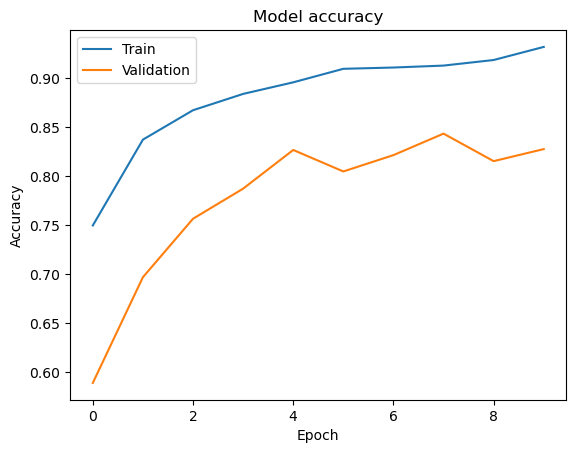

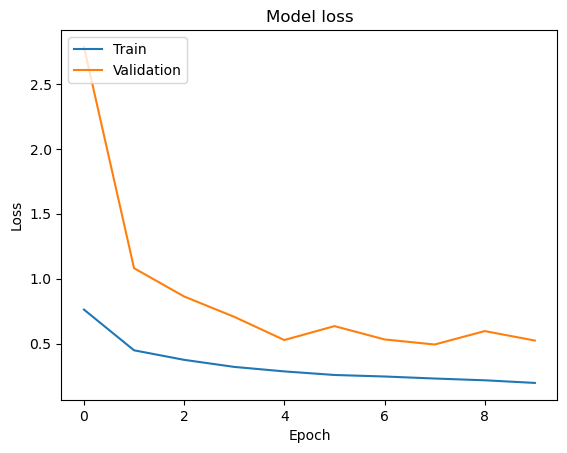

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory='Testing',  # Update this path to where your test dataset is stored
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' or 'binary' based on your problem
)


Found 1311 images belonging to 4 classes.


## 6. Evaluation and Prediction

In [16]:
# Assuming test_generator is prepared similarly to train_generator and validation_generator
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# For precision, recall, F1-score, you'll need to predict on the test set and compare to actual labels
# This is a simplified example
from sklearn.metrics import classification_report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


11/11 [==============================] - 4s 324ms/step - loss: 0.5032 - accuracy: 0.8505
Test accuracy: 0.8504958152770996
Test loss: 0.5032050609588623
 1/11 [=>............................] - ETA: 1s

2024-04-29 02:57:10.452072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 342ms/step
              precision    recall  f1-score   support

      glioma       0.24      0.23      0.23       300
  meningioma       0.23      0.15      0.18       306
     notumor       0.29      0.31      0.30       405
   pituitary       0.22      0.29      0.25       300

    accuracy                           0.25      1311
   macro avg       0.25      0.24      0.24      1311
weighted avg       0.25      0.25      0.25      1311



- Prepare test data in the same way as training data.
- Evaluate the model on the test data.
- Predict and calculate classification metrics to assess performance.

## Further Refining the model

In [17]:
x = Dropout(0.6)(x)  # Increase dropout rate to 0.6, for example


In [18]:
from keras.regularizers import l1, l2

# Build a classification model on top of Base Network with added layers and regularizations
input_layer = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input_layer)
x = Flatten()(output_vgg16_conv)

# Add L1 regularization to the first Dense layer
x = Dense(512, activation='relu', kernel_regularizer=l1(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Add L2 regularization to the second Dense layer
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer remains the same
x = Dense(4, activation='softmax')(x)

# Create model
model = Model(input_layer, x)


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training with callbacks
callbacks = [ModelCheckpoint('vgg16-improved-weights.h5', monitor='val_accuracy', save_best_only=True)]

history = model.fit(
    train_generator,
    epochs=nb_epochs,
    callbacks=callbacks,
    validation_data=validation_generator
)

print('Training Completed!')

Epoch 1/10


2024-04-29 02:57:14.949547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.1089 - accuracy: 0.7576

2024-04-29 02:57:29.266910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 503ms/step - loss: 4.1089 - accuracy: 0.7576 - val_loss: 4.2603 - val_accuracy: 0.6240
Epoch 2/10
36/36 [==============================] - 18s 488ms/step - loss: 2.1771 - accuracy: 0.8370 - val_loss: 2.3592 - val_accuracy: 0.6731
Epoch 3/10
36/36 [==============================] - 18s 486ms/step - loss: 1.4990 - accuracy: 0.8525 - val_loss: 1.6816 - val_accuracy: 0.7160
Epoch 4/10
36/36 [==============================] - 18s 490ms/step - loss: 1.1379 - accuracy: 0.8716 - val_loss: 1.4901 - val_accuracy: 0.7441
Epoch 5/10
36/36 [==============================] - 18s 492ms/step - loss: 0.9541 - accuracy: 0.8810 - val_loss: 1.2031 - val_accuracy: 0.7721
Epoch 6/10
36/36 [==============================] - 18s 491ms/step - loss: 0.8460 - accuracy: 0.8810 - val_loss: 1.3459 - val_accuracy: 0.6880
Epoch 7/10
36/36 [==============================] - 18s 503ms/step - loss: 0.8132 - accuracy: 0.8792 - val_loss: 1.0526 - val_accuracy: 0.7730
Epoch 8/10

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                           

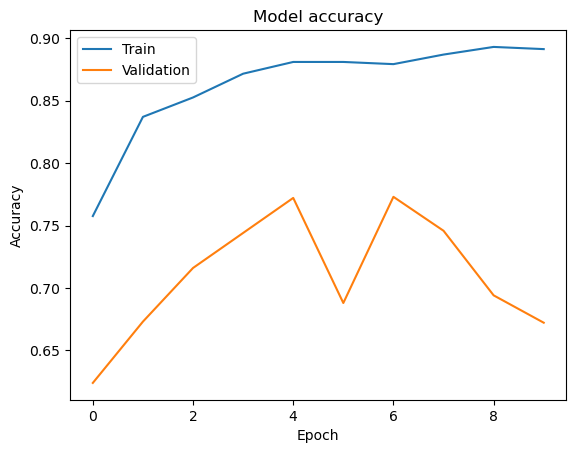

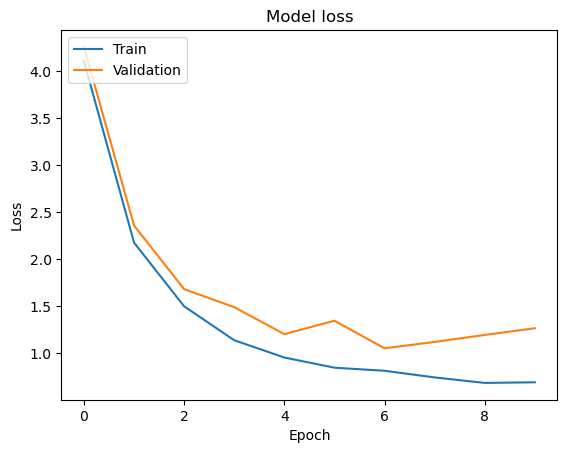

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory='Testing',  # Update this path to where your test dataset is stored
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' or 'binary' based on your problem
)

Found 1311 images belonging to 4 classes.


In [23]:
# Assuming test_generator is prepared similarly to train_generator and validation_generator
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# For precision, recall, F1-score, you'll need to predict on the test set and compare to actual labels
# This is a simplified example
from sklearn.metrics import classification_report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

11/11 [==============================] - 4s 327ms/step - loss: 0.9882 - accuracy: 0.7704
Test accuracy: 0.7704042792320251
Test loss: 0.9881846904754639
 1/11 [=>............................] - ETA: 1s

2024-04-29 03:00:23.001734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 337ms/step
              precision    recall  f1-score   support

      glioma       0.22      0.29      0.25       300
  meningioma       0.25      0.18      0.21       306
     notumor       0.34      0.41      0.37       405
   pituitary       0.25      0.16      0.20       300

    accuracy                           0.27      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.27      0.27      0.27      1311

